# Анализ игрового рынка

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/.../games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.shape

(16715, 11)

В датасете присутствует более 16 тысяч игр и 11 признаков.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В большинстве полей нет пропусков, однако в последних 3 полях пропусков достаточно много - почти половина.

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В данных представлены игры с 1980 по 2016 года. Важно отметить, что у большого количества игр были нулевые продажи в различных регионов, ну или данных по ним нет, а в полях указаны нули.

##  Подготовка данных

### Замена названий столбцов

In [7]:
#напишем функцию, которая уменьшает регистр всех колонок в датафрейме
def lowercase_columns(df):
    renamed_columns = {col: col.lower() for col in df.columns}
    df = df.rename(columns=renamed_columns)
    return df

In [8]:
#применяем функцию
df = lowercase_columns(df)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

In [9]:
#посмтотрим, данные какого типа находятся в датафрейме
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [10]:
#изменим тип данных столбца с годом релиза с числового с плавающей точкой на object, чтобы не было ситуации, что год дробтится
df['year_of_release'] = df['year_of_release'].astype('object')

In [11]:
#необходимо заменить тип данных столбца user_score с object на float64
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы видим, что в одном из юникальных значений присутствует строка 'tbd' ("To Be Determined"), поэтому при конвертации типа данных заменим ее на отстутсвующее значение. 

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [13]:
df.dtypes

name                object
platform            object
year_of_release     object
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Вывод**: типы данных заменены в ряде полей.

### Обработка пропусков. 

In [14]:
#еще раз посмотрим, в каких столбцах присутствуют пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
#посмотрим, что за строки, где в играх отсутствуют названия
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
#удалим эти строки, так как они не несут никакой полезной информации
df = df.dropna(subset=['name'])

Есть ряд игр, где не отображен год релиза, однако их незначительное количетсво. Можно оставить как есть. Значительно большая проблема наблюдается в последних трех столбцах, где почти половина значений отсутствует. С последним столбцом мы точно ничего не сможем сделать, так как там категориальные данные. Мы могли бы в столбцах с critic_score и user_score указать медианные значения всей выборки, но тогда бы мы сильно ее исказили, так как в таком случае распределение было бы сильно искажено в центре. Поэтому оставим так, как есть, но будем иметь в виду, что в данных столбцах данные неполные.

**Вывод**: удалили пропуски там, где могли.

### Создание новых столбцов

In [17]:
#создадим новый столбец, где бы указывалась суммарные объемы продажи игры по всем регионам

In [18]:
df['amount_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**: создали необходимый столбец с суммой всех продаж

### Проверка на дубликаты

In [20]:
#проверим датафрейм на налиличие явных дубликатов
df[df.duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales


Явных дубликатов в датафрейме нет.

In [21]:
#проверим датафрейм на наличие неявных дубликатов
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Был обнаружим один неявный дубликат. Удалим его и проверим, остались ли дубликаты.

In [22]:
df = df.drop_duplicates(subset=['name', 'platform','year_of_release'])

In [23]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales


**Вывод:** были, там где это нужно, изменены типы данных полей. Изучены столбцы с пропусками, удалены дубликаты, а также создан новый столбец с совокупными продажами.

## Исследовательский анализ данных

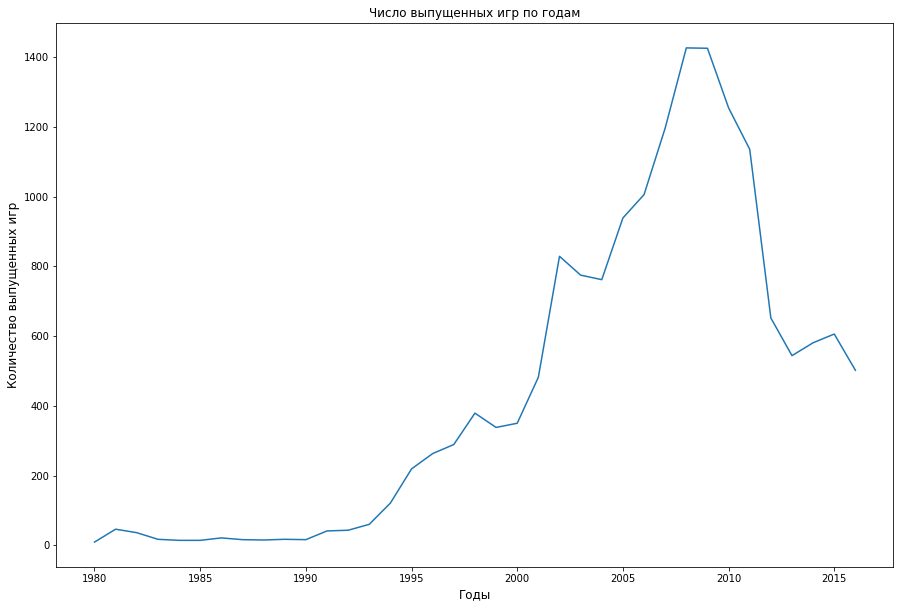

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby('year_of_release')['name'].count().plot()
plt.title('Число выпущенных игр по годам')
ax.set_xlabel('Годы', fontsize=12)  
ax.set_ylabel('Количество выпущенных игр', fontsize=12)
plt.show()

До примерно 1993 среднее количество выпускаемых игр было совсем небольшим. С середины 1990-ых их выпуск резко начал расти до 1400 штук в год к 2010. Однако в дальнейшим число выпущенных игр резко упало до в среднем 600 в год. При этом в рамках исследования нам не так важны данные за наиболее старые периоды.

Дальше попробуем посмотреть, динамику выпуска популярных игр по платформам.

In [25]:
#найдем топ 20 самых популярных платформ
popular_platform = df.groupby('platform')['name'].count().sort_values(ascending=False).head(20).index
popular_platform

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600'],
      dtype='object', name='platform')

In [26]:
#сгруппируем датафрейм по годам и платформам 
grouped_by_platform = df[df['platform'].isin(popular_platform)].groupby(['year_of_release', 'platform'], as_index=False)['name'].count(). \
    rename(columns={'name':'amount'})
grouped_by_platform

,year_of_release,platform,amount
0,1980.0,2600,9
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1984.0,2600,1
...,...,...,...
182,2016.0,PSV,85
183,2016.0,Wii,1
184,2016.0,WiiU,14
185,2016.0,X360,13


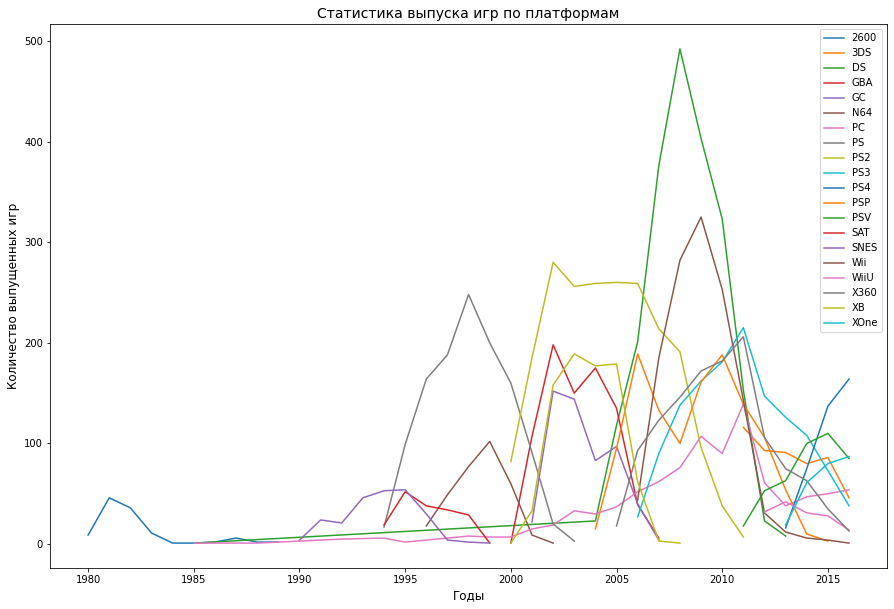

In [27]:
#из таблицы плохо можно увидеть динамику, поэтому визуализируем данные
fig, ax = plt.subplots(figsize=(15, 10))
grouped = grouped_by_platform.groupby('platform')
for platform, data in grouped:
    ax.plot(data['year_of_release'], data['amount'], label=platform)

ax.legend()  
ax.set_xlabel('Годы', fontsize=12)  
ax.set_ylabel('Количество выпущенных игр', fontsize=12)  
ax.set_title('Статистика выпуска игр по платформам', fontsize=14)  

plt.show()

Видно, что большая часть платформ уже давно не актуальна. Детальнее посмотрим на последние 10 лет.

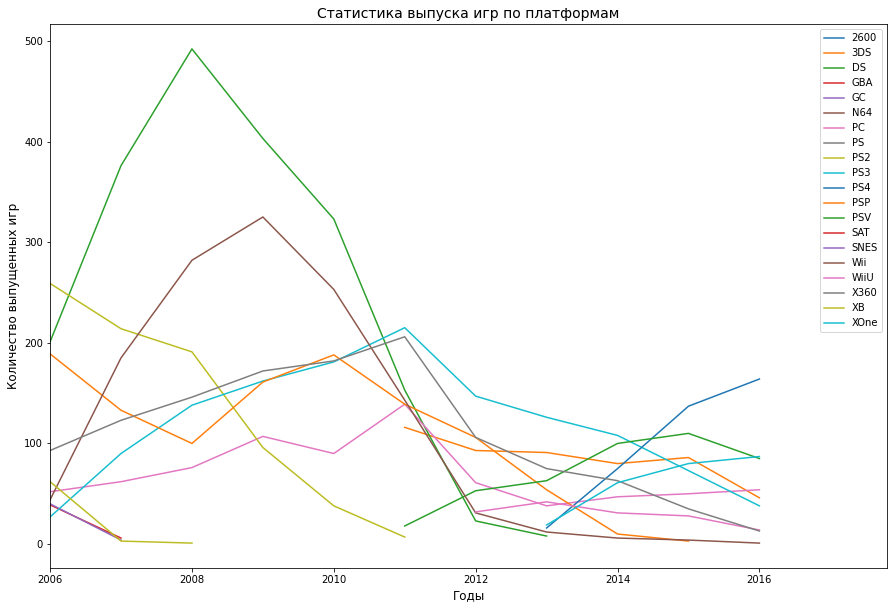

In [28]:
#из таблицы плохо можно увидеть динамику, поэтому визуализируем данные
fig, ax = plt.subplots(figsize=(15, 10))
grouped = grouped_by_platform.groupby('platform')
for platform, data in grouped:
    ax.plot(data['year_of_release'], data['amount'], label=platform)

ax.legend()  
ax.set_xlabel('Годы', fontsize=12)  
ax.set_ylabel('Количество выпущенных игр', fontsize=12)  
ax.set_title('Статистика выпуска игр по платформам', fontsize=14)  
ax.set_xlim(2006)
plt.show()

Видно, что игровая индустрия начала чильно меняться в диапазоне 2011-2013 годов. За эти годы появились сразу 4 новых платформы, а популярность старых платформ со временем падает. Ряд старых платформ совсем исчезает. Поэтому Я думаю, что в качестве актуального периода лучше взять данные с 2013 года, так как более ранние года с устаревшими платформами скорее всего будут не актуальными к 2017 году.

In [29]:
#обрежем датафрейм до актуальных дат
new_df = df[df['year_of_release'] >= 2013]
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [30]:
#посмотрим, какую выручку приносили игры различных платформ в зависимости от года
sales_platform = new_df.groupby(['year_of_release', 'platform'], as_index=False)['amount_sales'].sum()

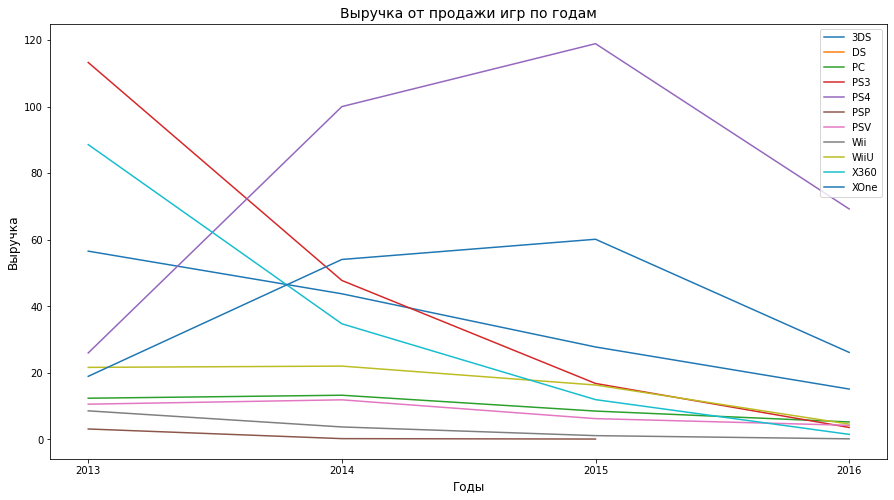

In [31]:
#
fig, ax = plt.subplots(figsize=(15, 8))
grouped = sales_platform.groupby('platform')
for platform, data in grouped:
    ax.plot(data['year_of_release'].astype(int), data['amount_sales'], label=platform)

ax.legend()  
ax.set_xlabel('Годы', fontsize=12)  
ax.set_ylabel('Выручка', fontsize=12)  
ax.set_title('Выручка от продажи игр по годам', fontsize=14) 
years = sales_platform['year_of_release'].unique().astype(int)
ax.set_xticks(years)
plt.show()

Как видно из графика в 2016 году было явное падение продаж игр по всем платформам. При этом наиболее перспективными все еще выглядели XOne и PS4, так как продажи по ним в 2014 и 2015 году росли. Платформа, которая к 2016 году была на 3 месте - 3DS, с 2013 года ежегодно теряла свою популярность. Поэтому на нее полагаться не стоит.

<function matplotlib.pyplot.show(close=None, block=None)>

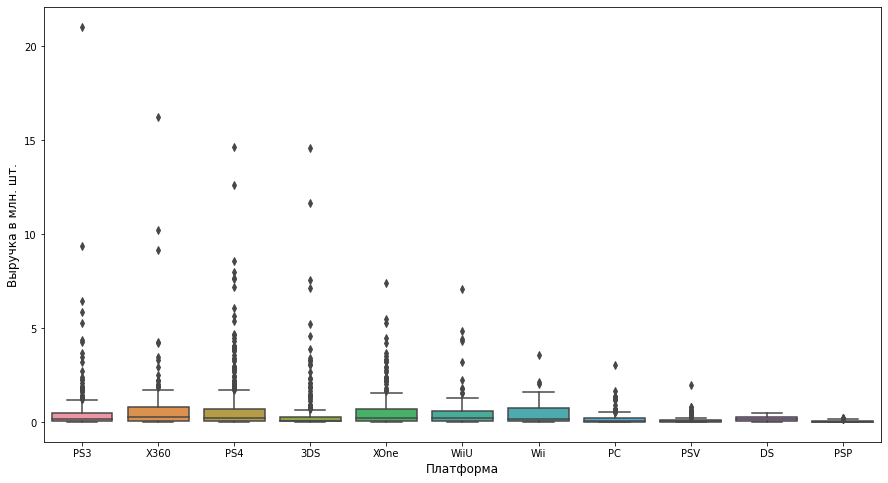

In [32]:
#посмотрим, как распределена выручка на игру по каждой платформе с помощью ящика с усами
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='platform', y='amount_sales', data=new_df)
ax.set_xlabel('Платформа', fontsize=12)  
ax.set_ylabel('Выручка в млн. шт.', fontsize=12)  
plt.show

Мы видим, что игровой рынок крайне ассиметричен. Большинство игр не собирают и миллиона копий, в то время как есть несколько выбросов с более чем 10 млн проданных копий.

Из-за большого количества выбросов, плохо видны медиана и квартили распределения. Ограничим отображения графика по оси y, чтобы лучше разглядеть данные показатели в различных платформах.

<function matplotlib.pyplot.show(close=None, block=None)>

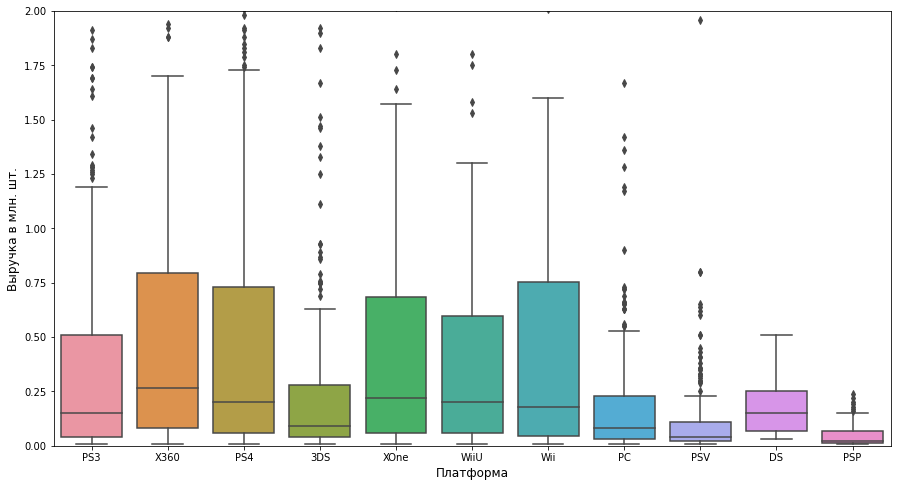

In [33]:
#посмотрим, как распределена выручка на игру по каждой платформе с помощью ящика с усами
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='platform', y='amount_sales', data=new_df)
plt.ylim(0, 2)
ax.set_xlabel('Платформа', fontsize=12)  
ax.set_ylabel('Выручка в млн. шт.', fontsize=12)  
plt.show

Даже приблизив график, мы видим что ассиметрия выручки очень большая. Медиана в большинстве групп находится ниже 250 тыс. проданных копий. Самые низкие показатели у PSP, PSV, PC и DS. Самые высокие - у наиболее популярных консолей из серий XBOX и PS.

Посмотрим, связаны ли продажи с отзывами критиков и пользователей на самой популярной платформе - PS4.

In [34]:
ps4 = new_df[new_df['platform'] == 'PS4']

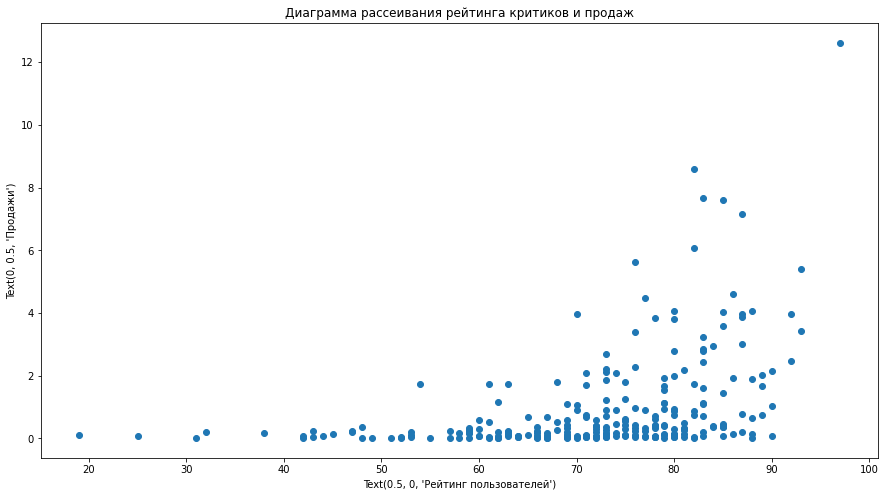

In [35]:
#построим график рассеивания между объемом продаж и рейтингом критиков
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(ps4['critic_score'], ps4['amount_sales'])

# Настройка осей и названий
plt.xlabel(plt.xlabel('Рейтинг пользователей'))
plt.ylabel(plt.ylabel('Продажи'))
plt.title('Диаграмма рассеивания рейтинга критиков и продаж')

# Отображение диаграммы
plt.show()

In [36]:
#узнаем корреляцию
ps4['critic_score'].corr(ps4['amount_sales'])

0.40656790206178095

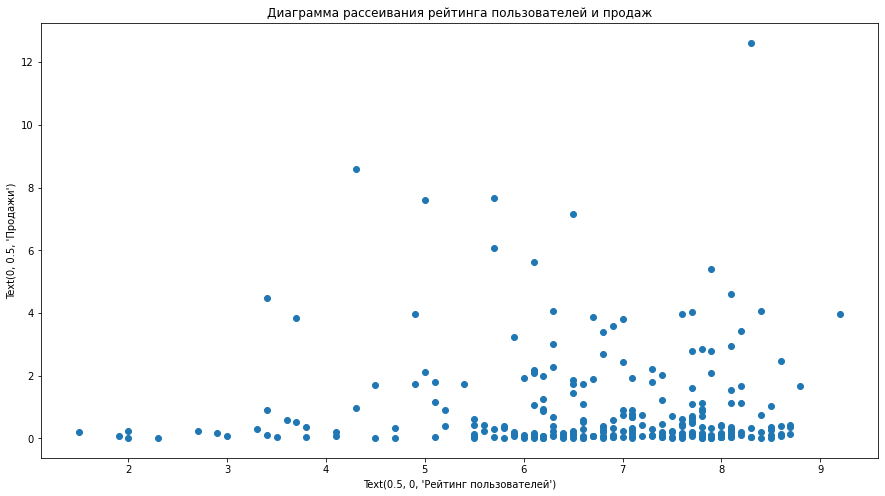

In [37]:
#построим график рассеивания между объемом продаж и рейтингом пользователей
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(ps4['user_score'], ps4['amount_sales'])

# Настройка осей и названий
plt.xlabel(plt.xlabel('Рейтинг пользователей'))
plt.ylabel(plt.ylabel('Продажи'))
plt.title('Диаграмма рассеивания рейтинга пользователей и продаж')

# Отображение диаграммы
plt.show()

In [38]:
#узнаем корреляцию
ps4['user_score'].corr(ps4['amount_sales'])

-0.031957110204556376

Интересно, что между рейтингом критиков и продажами игр наблюдается явная корреляция, в то время как между оценками пользователей и продажами корреляция не прослеживается. Посмотрим, является ли это явление уникальным для этой платформы, или оно имеет общий характер.

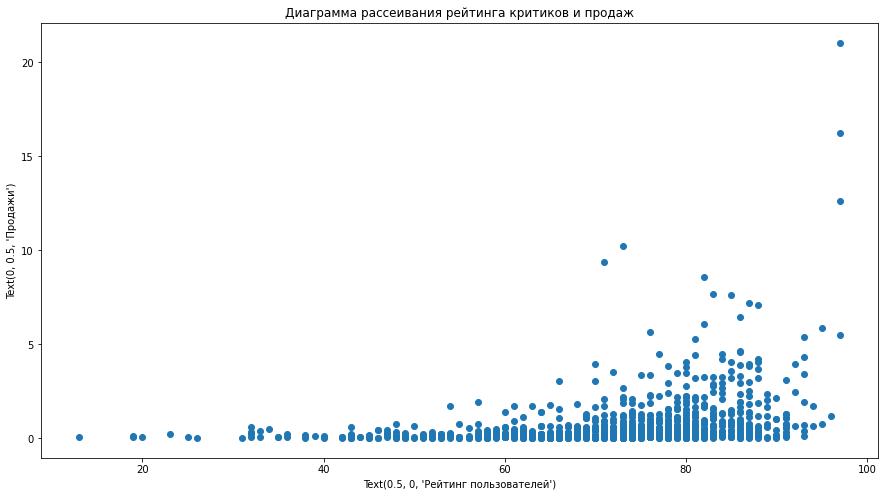

In [39]:
#построим график рассеивания между объемом продаж и рейтингом критиков
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(new_df['critic_score'], new_df['amount_sales'])

# Настройка осей и названий
plt.xlabel(plt.xlabel('Рейтинг пользователей'))
plt.ylabel(plt.ylabel('Продажи'))
plt.title('Диаграмма рассеивания рейтинга критиков и продаж')

# Отображение диаграммы
plt.show()

In [40]:
#узнаем корреляцию
new_df['critic_score'].corr(new_df['amount_sales'])

0.3136995151027371

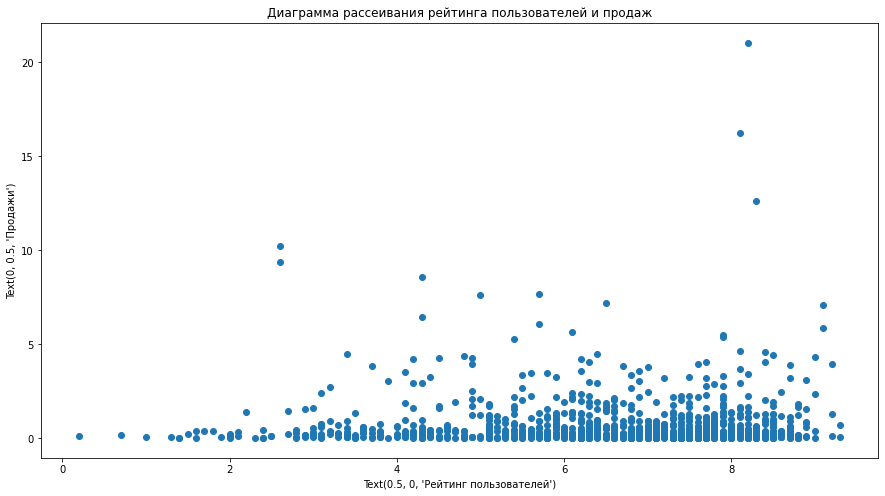

In [41]:
#построим график рассеивания между объемом продаж и рейтингом пользователей
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(new_df['user_score'], new_df['amount_sales'])

# Настройка осей и названий
plt.xlabel(plt.xlabel('Рейтинг пользователей'))
plt.ylabel(plt.ylabel('Продажи'))
plt.title('Диаграмма рассеивания рейтинга пользователей и продаж')

# Отображение диаграммы
plt.show()

In [42]:
new_df['user_score'].corr(new_df['amount_sales'])

-0.0026078133545982744

На общих данных выводы сопоставимые. Немного меньше корреляция между рейтингом критиков и продажами, но она все еще есть. А корреляция между рейтингом пользователей все еще нулевая.

In [43]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


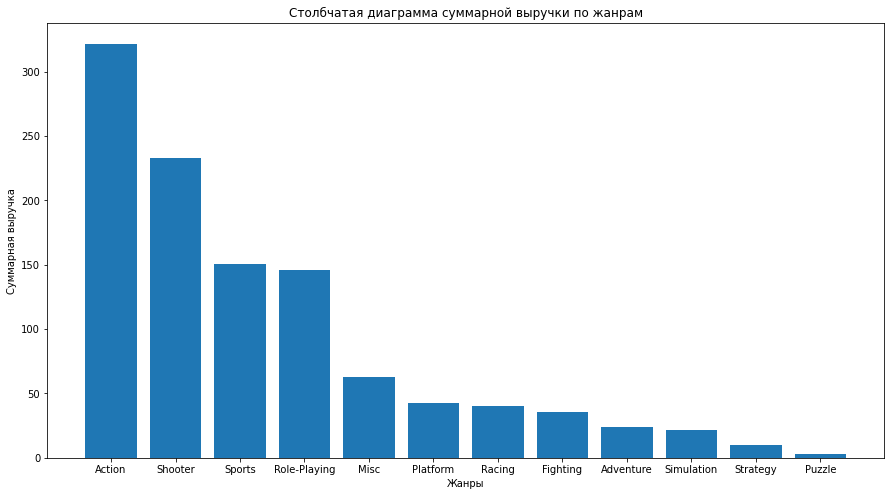

In [44]:

#рассмотрим распределение выручки по жанрам
genre_revenue = new_df.groupby('genre')['amount_sales'].sum().sort_values(ascending=False)
#построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(genre_revenue.index, genre_revenue.values)

# Настройка осей и названий
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка')
plt.title('Столбчатая диаграмма суммарной выручки по жанрам')

# Отображение диаграммы
plt.show()

Жанрами, приносящими наибольший доход, являются экшн, шутеры, спортивные игры и РПГ. Пазлы и стратегии привлекают не так много людей.

Посмотрим, как собирают игры различных жанров "в среднем" в с помощью боксплота.

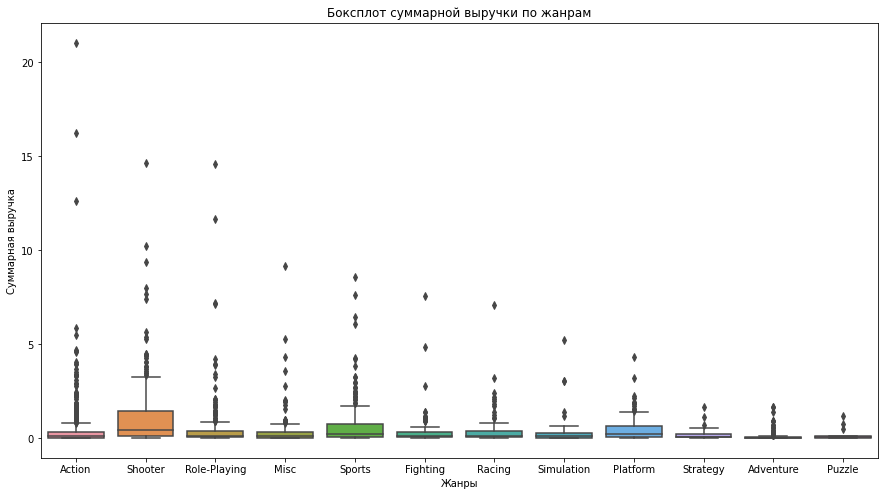

In [45]:
#рассмотрим распределение выручки по жанрам
genre_revenue = new_df.groupby('genre')['amount_sales'].sum().sort_values(ascending=False)
#построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='genre', y='amount_sales', data=new_df)

# Настройка осей и названий
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка')
plt.title('Боксплот суммарной выручки по жанрам')

# Отображение диаграммы
plt.show()

Как в случае с первым боксполотом, мы видим, что существует огромное количество выбросов - те игры, которые стали хитами и имели огромные сборы. Посмотрим на распределение, не учитывая эти выбросы.

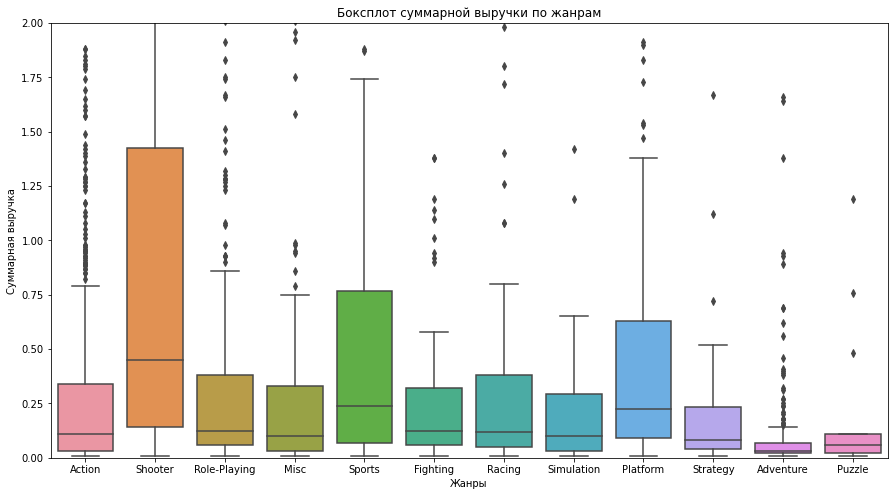

In [46]:
#рассмотрим распределение выручки по жанрам
genre_revenue = new_df.groupby('genre')['amount_sales'].sum().sort_values(ascending=False)
#построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='genre', y='amount_sales', data=new_df)

# Настройка осей и названий
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка')
plt.title('Боксплот суммарной выручки по жанрам')
plt.ylim(0, 2)
# Отображение диаграммы
plt.show()

Какие же в среднем доходные шутеры! Отрыв от других жанров просто колоссальный. На втором месте - спортивные игры, на третьей - платформеры. А вот игры из жанра приключений самые низкодоходные.

**Вывод:** исследовательский анализ данных показал, что актуальным для исследования периодом является диапазон с 2013 года, когда начали набирать популярность консоли нового поколения. Две наиболее популярные платформы: PS4 и XOne. Выручка от продажи конкретной игры имеет распределение с большими выбросами: лишь небольшое количество игр добивается больших продаж. Обнаружена корреляция между объемом продаж и рейтингом критиков, при этом такой зависимости не обнаружено по отношению к рейтингу пользователей. Двумя самыми популярными жанрами являются экшн и шутер. При этом в среднем самыми доходными играми являются именно шутеры, оставляющие другие жанры далеко сзади.

## Портрет пользователя по регионам

Определим топ 5 самых популярных платформ в различных регионах.

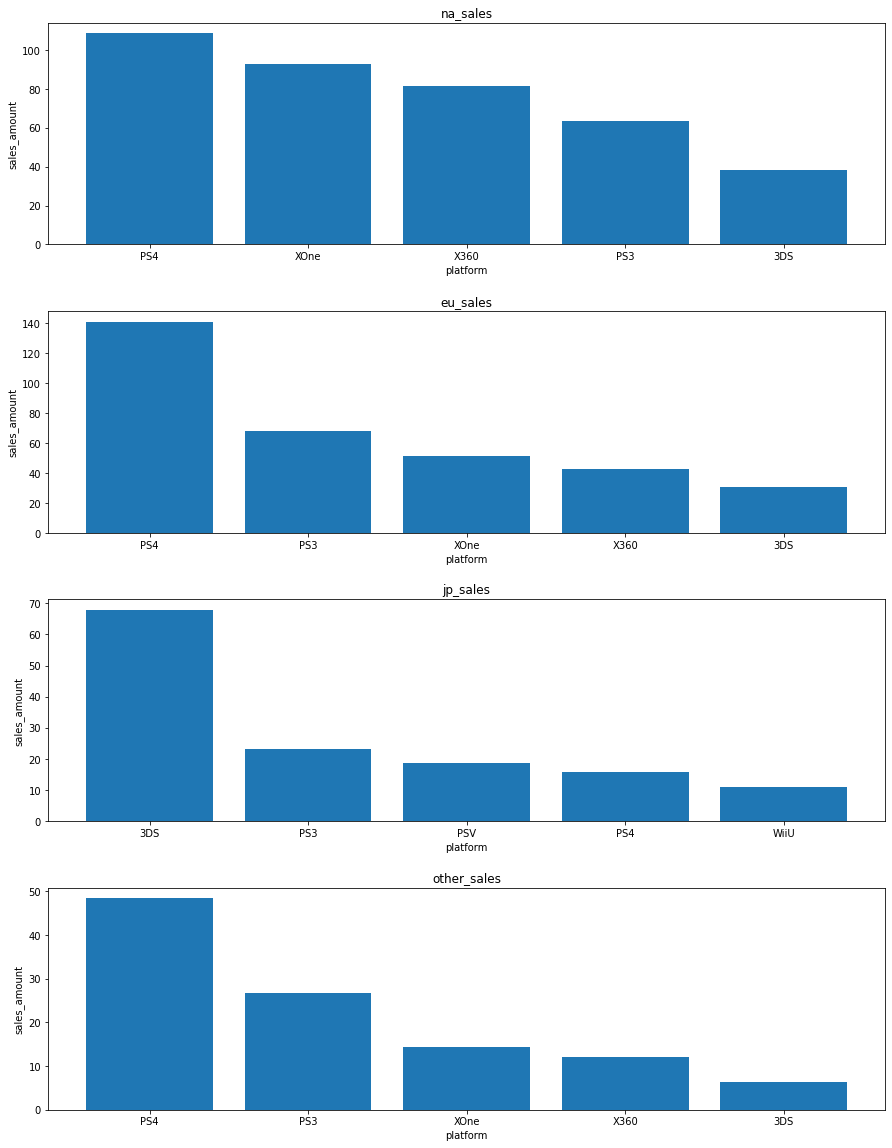

In [47]:
#составим столбчатую диаграмму с топ 5 самых популярных платформ по регионам
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)
for i, feature in enumerate(new_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]):
    ax1 = axes[i]
    ax1.bar(new_df.groupby('platform')[feature].sum().sort_values(ascending=False).head(5).index,
            new_df.groupby('platform')[feature].sum().sort_values(ascending=False).head(5).values)
    ax1.set_xlabel('platform')
    ax1.set_ylabel('sales_amount')
    ax1.set_title(feature)
plt.show()

Почти во всех регионах, не считая Японии, самой популярной консолью является PS4. В США при этом на втором месте находится XOne, который лишь немногим уступает PS4. В Европе и остальных странах ситуация примерно сопоставимая, и там на втором месте находится более старая PS3, а XOne только на третьем месте. В Японии совершенно особенная ситуация - явное доминирования 3DS, которая в остальных регионах занимает 5 место. А игры на консолях нового поколения не являются популярными в Японии: популярность игр на PS3 выше, чем на PS4.

Посмотрим на распределение топ 5 жанров игр по регионам.

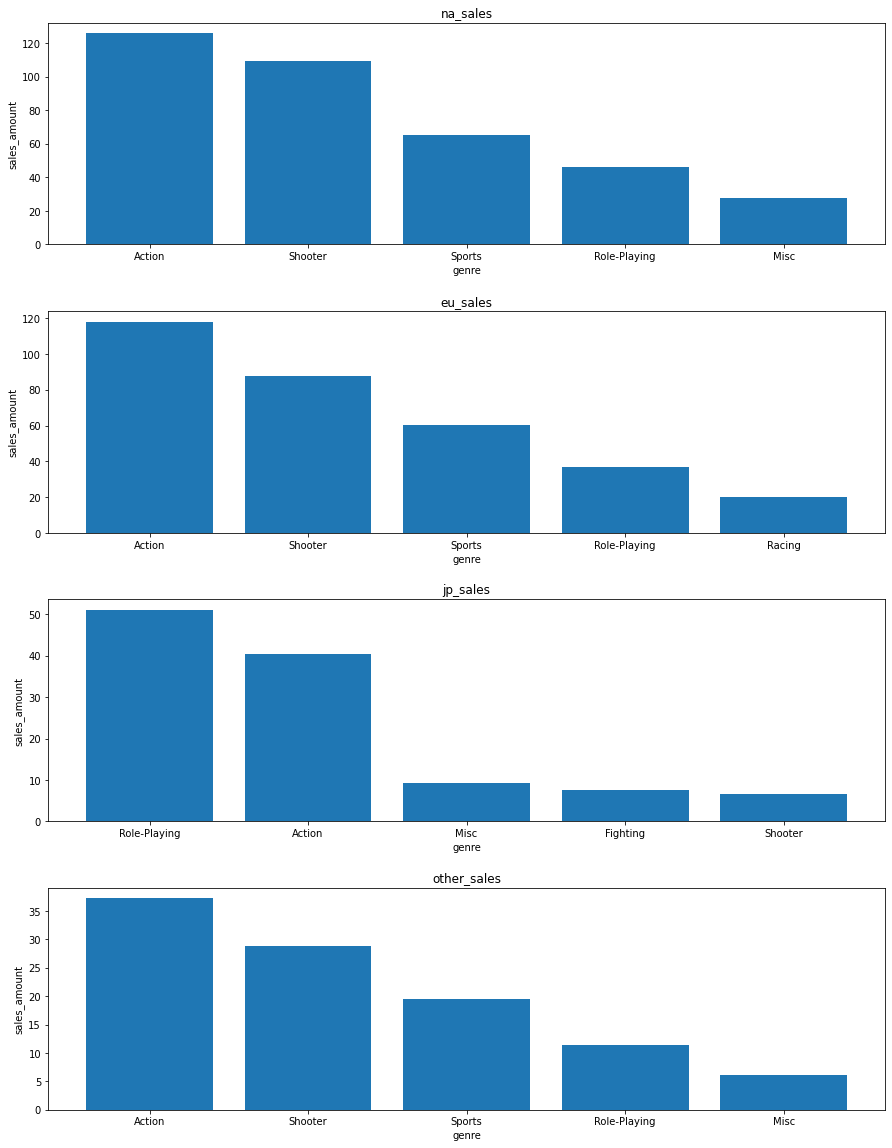

In [48]:
#составим столбчатую диаграмму с топ 5 самых популярных жанров по регионам
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)
for i, feature in enumerate(new_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]):
    ax1 = axes[i]
    ax1.bar(new_df.groupby('genre')[feature].sum().sort_values(ascending=False).head(5).index,
            new_df.groupby('genre')[feature].sum().sort_values(ascending=False).head(5).values)
    ax1.set_xlabel('genre')
    ax1.set_ylabel('sales_amount')
    ax1.set_title(feature)
plt.show()

Что касается распределения продаж игр по жанрам, то в этом разрезе опять выделяется Япония. Во всех дркугих регионах первые три по популярности жанра: Action, Shooter, Sports Genre. А вот в Японии на первом месте РПГ, на втором - полпулярный во всем мире Action, а вот остальные жанры в разы уступают по популярности первым двум.

Посмотрим, влияет ли рейтинг ESRB на продажи по регионам.

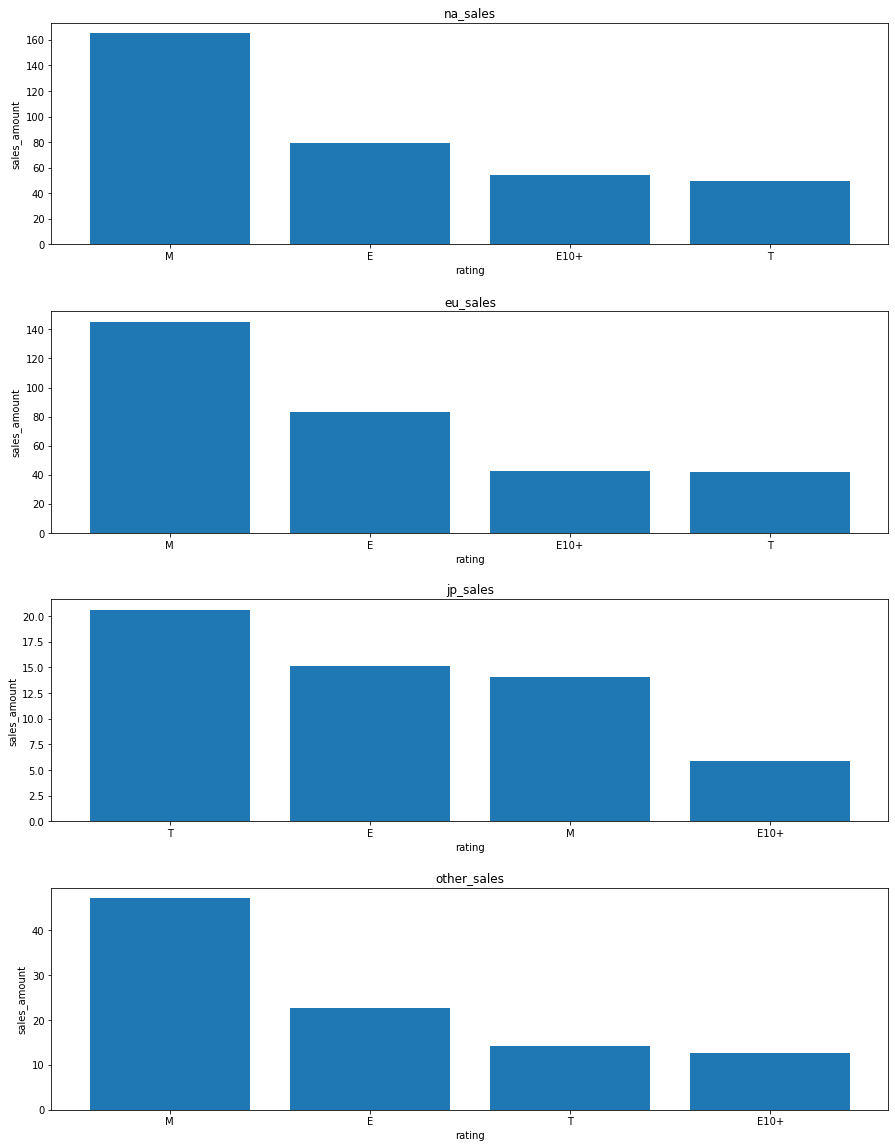

In [49]:
#составим столбчатую диаграмму с продажами игр разного рейтинга по регионам
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)
for i, feature in enumerate(new_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]):
    ax1 = axes[i]
    ax1.bar(new_df.groupby('rating')[feature].sum().sort_values(ascending=False).head(5).index,
            new_df.groupby('rating')[feature].sum().sort_values(ascending=False).head(5).values)
    ax1.set_xlabel('rating')
    ax1.set_ylabel('sales_amount')
    ax1.set_title(feature)
plt.show()

В разрезе рейтингов опять выделяется Япония. Если во всех остальных регионах самые популярные игры имеют рейтинг M (только для взрослых), то в Японии - T (c 13 лет), в то время как игры для взрослых занимают 3 место.

**Вывод**: портрет пользователей во всех регионах кроме Японии очень схож. Единственное существенное отличие - в США достаточно популярны X боксы, в то время как в Европе и остальном мире доминирование явное у PS. В Японии же отличается практически все: самая популярная платформа - Нинтендо, самые популярный жанр - не экшн, а РПГ, самый популярный возрастной рейтинг не Mature, а Teen.

## Проверка гипотез

Сначала проверим, имеется ли существенное различие между средними пользовательскими рейтингами платформ XOne и PC. \
В этом случае нулевая гипотеза - средний рейтинг игр на XOne и PC одинаков, альтернативная - они отличаются.

При проверке статистически значимого уровня различия между выборками нам необходимо избавиться от отсутствующих значений. 

In [50]:
#cоздадим датафрейм только с данными о пользовательских рейтингах для игр на XOne и PC без отсутствующих значений.
df_XOne_PC = new_df.query("platform == 'XOne' | platform == 'PC'")[['platform', 'user_score']].dropna()

Посмотрим, как распределены данные в двух выборках.

<AxesSubplot:>

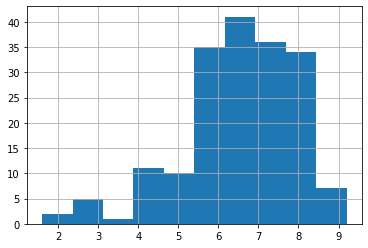

In [51]:
df_XOne_PC[df_XOne_PC['platform']=='XOne']['user_score'].hist()

<AxesSubplot:>

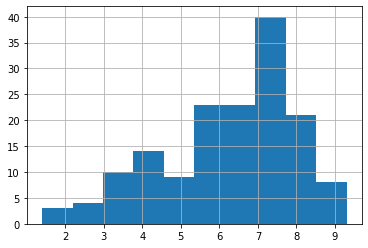

In [52]:
df_XOne_PC[df_XOne_PC['platform']=='PC']['user_score'].hist()

Данные имеют явно скошенный характер в правую сторону: большинство пользователей ставят оценки на уровне 7. С учетом того, что распределение не носит явно нормальный характер, а также с учетом небольшого размера выборки, лучше использовать при проверке гипотез Тест Манна-Уитни, а не классический T-тест.

In [53]:
# узнаем p_value
print('P-Value: {0:.3f}'.format(stats.mannwhitneyu(df_XOne_PC[df_XOne_PC['platform']=='XOne']['user_score'], df_XOne_PC[df_XOne_PC['platform']=='PC']['user_score'])[1]))
# узнаем относительное различие средних двух выборок 
print('Относительное различие выборок: {0:.3f}'.format(df_XOne_PC[df_XOne_PC['platform']=='XOne']['user_score'].mean() / df_XOne_PC[df_XOne_PC['platform']=='PC']['user_score'].mean()-1))

P-Value: 0.501
Относительное различие выборок: 0.040


Определим порог статистической значимости на уровне 0.05 (значение alpha). P-value значительно выше этого значения. Значит, мы не можем отвергнуть нулевую гипотезу о равенстве двух выборок. При этом средние значения двух выборок отличаются всего на 4%.

Проверим гипотезу, имеется ли существенное различие между средними пользовательскими рейтингами в жанрах Action и Sports.

При проверке статистически значимого уровня различия между выборками нам необходимо избавиться от отсутствующих значений. 

In [54]:
new_df['genre'].unique()


array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [55]:
#cоздадим датафрейм только с данными о пользовательских рейтингах для игр жанров Action и Sports без отсутствующих значений.
df_action_sports = new_df.query("genre == 'Action' | genre == 'Sports'")[['genre', 'user_score']].dropna()

Посмотрим распределение данных.

<AxesSubplot:>

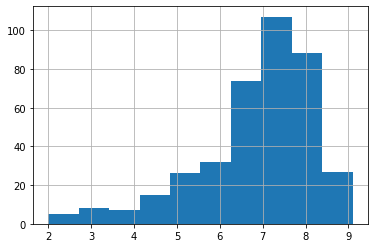

In [56]:
df_action_sports[df_action_sports['genre']=='Action']['user_score'].hist()

<AxesSubplot:>

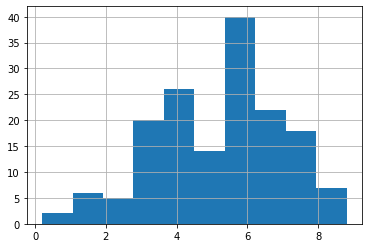

In [57]:
df_action_sports[df_action_sports['genre']=='Sports']['user_score'].hist()

Оценки пользователей жанра экшн скошенны сильно вправо. А оценки игр жанра спорт и вовсе имеют 2 вершины. В обоих случаеях распределение далеко от нормального. Также воспользуемся тестом Манна Уитни.

In [58]:
# узнаем p_value
print('P-Value: {0:.30f}'.format(stats.mannwhitneyu(df_action_sports[df_action_sports['genre']=='Action']['user_score'], df_action_sports[df_action_sports['genre']=='Sports']['user_score'])[1]))
# узнаем относительное различие средних двух выборок 
print('Относительное различие выборок: {0:.3f}'.format(df_action_sports[df_action_sports['genre']=='Action']['user_score'].mean() / df_action_sports[df_action_sports['genre']=='Sports']['user_score'].mean()-1))

P-Value: 0.000000000000000000000015189171
Относительное различие выборок: 0.305


P-Value оказался очень маленьким, значительно меньше порога статистической значимости. Таким образом, мы можем с уверенностью отклонить нулевую гипотезу о равенстве средних двух выборок.

**Вывод**: первый тест показал, что средние пользовательские рейтинги платформ XOne и PС одинаковые. Результат второго теста: средние пользовательские рейтинги игр жанров Action и Sports отличаются.

# Выводы

1. В результате исследовательского анализа данных было выявлено, что наиболее перспективными и популярными платформами к 2016 году были PS4 и XOne. Практически везде доминирует PS4. В США она обгоняет XOne незначительно, в то время как в Европе у нее бесуловное первенство. В отдельном регионе - Японии, самой популярной платформой является 3DS, что делает данный рынок уникальным.
2. Самые прибыльные жанры почти по всему миру - экшн, шутер и спорт. В Японии ключевым жанром является РПГ.
3. Наблюдается явная корреляция между рейтингом критиков игр и выручкой с их продажи. Причем такая корреляция не была обнаружена в случае с пользовательским рейтингом.
4. Выручка с продаж игр распределена крайне неравномерно. Лишь небольшое количество игр имеют значительную выручку, в то время как другие собирают не так много денег.
5. Наиболее популярный почти по всему возрастной рейтинг игр - Mature. В Японии самым популярным является рейтинг - Teen.